In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
#Other data sets were explored, but the only data set used for 
#prediction was 'kiva_loans'

kiva_loans = pd.read_csv('kiva_loans.csv')
#country_stats = pd.read_csv('country_stats.csv')
#hh_size = pd.read_csv('household_size.csv')
#indicate = pd.read_csv('indicators.csv')
#DHS = pd.read_csv('KIVA.DHSv4.csv')
#loan_coord = pd.read_csv('loan_coords.csv')
#loans_lenders = pd.read_csv('loans_lenders.csv')
#MPI = pd.read_csv('MPI_subnational.csv')


In [3]:
kiva_loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [4]:
kiva_loans.shape

(671205, 20)

In [5]:
kiva_loans.dtypes

id                      int64
funded_amount         float64
loan_amount           float64
activity               object
sector                 object
use                    object
country_code           object
country                object
region                 object
currency               object
partner_id            float64
posted_time            object
disbursed_time         object
funded_time            object
term_in_months        float64
lender_count            int64
tags                   object
borrower_genders       object
repayment_interval     object
date                   object
dtype: object

In [6]:
null_values = kiva_loans.isnull().sum().sort_values(ascending = False)
print(null_values)

tags                  171416
region                 56800
funded_time            48331
partner_id             13507
use                     4232
borrower_genders        4221
disbursed_time          2396
country_code               8
date                       0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
currency                   0
country                    0
repayment_interval         0
posted_time                0
term_in_months             0
lender_count               0
id                         0
dtype: int64


In [7]:
#find out if any loans had zero funding; because original output
#was concatinating, I displayed 999 rows so I could find out how 
#many 0.0 loans there were

with pd.option_context('display.max_rows', 999):
    print(kiva_loans.funded_amount.value_counts())

225.0       34402
300.0       30676
200.0       27445
500.0       27318
250.0       26704
125.0       26254
400.0       23847
350.0       22270
325.0       21065
275.0       20093
175.0       19676
450.0       17251
1000.0      15930
150.0       15743
600.0       15096
425.0       13429
100.0       13060
375.0       11729
475.0       11593
575.0       10982
525.0       10175
650.0        9798
700.0        9479
550.0        9340
800.0        8942
675.0        8803
1500.0       8796
625.0        8157
750.0        7135
900.0        6841
75.0         6778
725.0        6154
1025.0       5519
775.0        5419
1200.0       4688
50.0         4643
1050.0       4493
875.0        4479
1100.0       4379
925.0        4306
950.0        4221
975.0        4211
850.0        4116
1075.0       4042
825.0        3925
2000.0       3825
1150.0       3423
0.0          3383
1125.0       3249
1175.0       3238
1300.0       2874
1475.0       2354
3000.0       2321
1450.0       2266
1275.0       2178
1250.0    

In [8]:
#making sure zero $ funded loans marked as Nan for 'funded_time'

kiva_loans.loc[(kiva_loans['funded_amount'] == 0.0) &
               kiva_loans['funded_time'].isnull()]

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
4814,1080275,0.0,5000.0,Food Production/Sales,Food,grow and create new jobs in my company.,US,United States,NaN,USD,NaN,2014-01-16 19:25:16+00:00,NaN,NaN,24.0,0,NaN,female,bullet,2014-01-16
6784,1080314,0.0,10000.0,Cosmetics Sales,Retail,start a new stream of income by offering retai...,US,United States,NaN,USD,NaN,2014-01-21 17:19:15+00:00,NaN,NaN,36.0,0,NaN,male,bullet,2014-01-21
10735,1080371,0.0,5000.0,Services,Services,purchase new equipment and market to more pote...,US,United States,NaN,USD,NaN,2014-01-29 13:38:16+00:00,NaN,NaN,24.0,0,NaN,male,bullet,2014-01-29
12037,1080417,0.0,5000.0,Food Production/Sales,Food,purchase much needed packaging that is sustain...,US,United States,NaN,USD,NaN,2014-02-03 13:45:55+00:00,NaN,NaN,24.0,0,NaN,male,bullet,2014-02-03
13542,1080465,0.0,1500.0,Crafts,Arts,"increase my inventory of handmade candles, dri...",US,United States,NaN,USD,NaN,2014-02-06 23:56:11+00:00,NaN,NaN,12.0,0,NaN,male,bullet,2014-02-06
14494,1080481,0.0,5000.0,Crafts,Arts,purchase African-American fine art and leverag...,US,United States,NaN,USD,NaN,2014-02-10 19:59:14+00:00,NaN,NaN,24.0,0,NaN,male,bullet,2014-02-10
23206,1080586,0.0,2500.0,Services,Services,reach and help more people via my consulting b...,US,United States,NaN,USD,NaN,2014-02-25 20:22:26+00:00,NaN,NaN,12.0,0,NaN,female,bullet,2014-02-25
26586,1080630,0.0,3500.0,Food Production/Sales,Food,"purchase health permits, peddlers permit, stre...",US,United States,NaN,USD,NaN,2014-03-05 12:09:50+00:00,NaN,NaN,24.0,0,NaN,male,bullet,2014-03-05
36075,688991,0.0,600.0,Personal Medical Expenses,Health,NaN,BO,Bolivia,NaN,USD,48.0,2014-03-25 20:22:44+00:00,2014-03-21 07:00:00+00:00,NaN,20.0,0,NaN,NaN,monthly,2014-03-25
36611,1080840,0.0,4000.0,Education provider,Education,complete my website and purchase materials for...,US,United States,NaN,USD,NaN,2014-03-26 18:18:51+00:00,NaN,NaN,24.0,0,NaN,female,bullet,2014-03-26


In [9]:
#I was originally going to use column 'funded_time' for binary y label,
#but it proved too difficult to dummy it due to all the dates; so 
#I calculated difference between 'funded_amount' and 'loan_amount'
#and put calculation in new column labeled 'funded'

lf = (kiva_loans.funded_amount - kiva_loans.loan_amount)
kiva_loans['funded'] = lf

In [10]:
kiva_loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,funded
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01,0.0
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01,0.0
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,0.0
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01,0.0
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,...,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01,0.0


In [11]:
#any row with a negative value means the loan was not fully funded

kiva_loans.funded.value_counts()

 0.0        622875
-300.0        1929
-250.0        1764
-350.0        1698
-275.0        1665
-200.0        1658
-325.0        1631
-225.0        1617
-400.0        1578
-375.0        1493
-175.0        1430
-500.0        1344
-425.0        1318
-450.0        1316
-150.0        1262
-475.0        1194
-125.0        1083
-75.0         1040
-525.0         967
-600.0         945
-575.0         932
-550.0         929
-100.0         888
-650.0         787
-625.0         786
-675.0         777
-700.0         730
-750.0         650
-725.0         619
-775.0         569
             ...  
-4635.0          1
-4645.0          1
-4720.0          1
-4780.0          1
-4570.0          1
-4790.0          1
-4810.0          1
-4835.0          1
-4840.0          1
-4845.0          1
-4870.0          1
-4580.0          1
-4535.0          1
-4095.0          1
-4215.0          1
-4105.0          1
-4115.0          1
-46400.0         1
-4180.0          1
-4190.0          1
-4195.0          1
-4305.0     

In [12]:
#Starting binarizing process; changing any value of 0.0 to 1
#which indicates load was fully funded

mask = kiva_loans.funded == 0.0
column_name = 'funded'
kiva_loans.loc[mask, column_name] = 1

In [13]:
#Changing any values that are not 1 to 0 which indicates loan not
#fully funded

alt = kiva_loans.funded != 1.0
column_name = 'funded'
kiva_loans.loc[alt, column_name] = 0

In [14]:
kiva_loans.funded.value_counts()

1.0    622875
0.0     48330
Name: funded, dtype: int64

In [15]:
#check isnull values before EDA begins

kiva_loans.isnull().sum()

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4232
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
funded                     0
dtype: int64

In [16]:
#drop isnull values in borrower_genders because genders may be a predictor
#regarding loan being funded

kiva_loans = kiva_loans.dropna(axis=0, subset=['borrower_genders'])

In [17]:
#double checking isnull values in borrower_genders were dropped

kiva_loans.isnull().sum()    

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                       11
country_code               8
country                    0
region                 52579
currency                   0
partner_id             13088
posted_time                0
disbursed_time          1981
funded_time            47649
term_in_months             0
lender_count               0
tags                  170107
borrower_genders           0
repayment_interval         0
date                       0
funded                     0
dtype: int64

In [18]:
#group genders and apply dummy variables

kiva_loans['gender']=[elem if elem in ['female','male'] else 'group' for elem in kiva_loans['borrower_genders']]
dummy = pd.get_dummies(kiva_loans['gender'])
kiva_loans = pd.concat([kiva_loans,dummy], axis =1)

In [19]:
#looking at statistics for funded loans

kiva_loans[kiva_loans['funded'] ==1].loan_amount.describe()

count    619336.000000
mean        796.924246
std        1147.720738
min          25.000000
25%         250.000000
50%         450.000000
75%         900.000000
max      100000.000000
Name: loan_amount, dtype: float64

In [20]:
#looking at statistics for non-funded loans; note the mean for non-funded
#is almost twice as much as funded loan mean

kiva_loans[kiva_loans['funded'] ==0].loan_amount.describe()

count    47648.000000
mean      1404.115073
std       1512.917035
min         25.000000
25%        600.000000
50%       1000.000000
75%       1500.000000
max      50000.000000
Name: loan_amount, dtype: float64

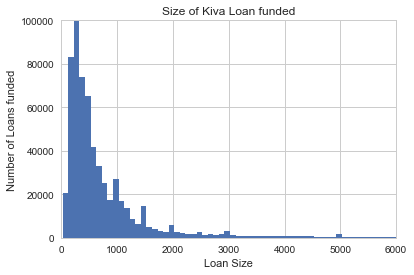

In [21]:
#plotting Number of Loans Funded by loan size

x = kiva_loans[kiva_loans['funded'] ==1].loan_amount  

plt.hist(x, 1000)
plt.xlabel('Loan Size')
plt.ylabel('Number of Loans funded')
plt.title('Size of Kiva Loan funded')
plt.axis([0, 6000, 0, 100000])
plt.grid(True)


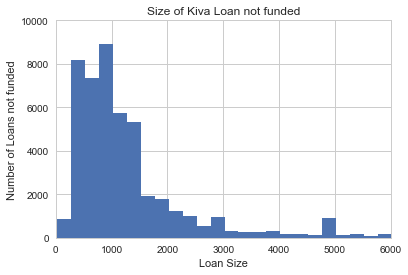

In [22]:
#Plotting number of loans not funded by loan size

y = kiva_loans[kiva_loans['funded'] == 0].loan_amount  
plt.hist(y, 200)
plt.xlabel('Loan Size')
plt.ylabel('Number of Loans not funded')
plt.title('Size of Kiva Loan not funded')
plt.axis([0, 6000, 0, 10000])
plt.grid(True)

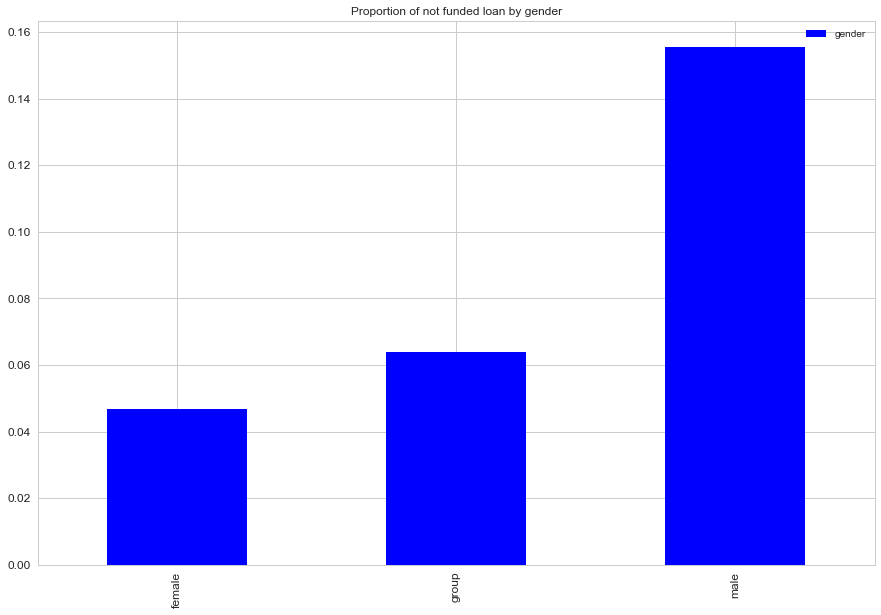

In [23]:
#It appears that loans being requested by males have a higher correlation
#of not being funded

(kiva_loans[kiva_loans['funded']==0]['gender'].value_counts()/kiva_loans['gender'].value_counts()).plot(kind='bar', title ="Proportion of not funded loan by gender", figsize=(15, 10), legend=True, fontsize=12, color = 'Blue')

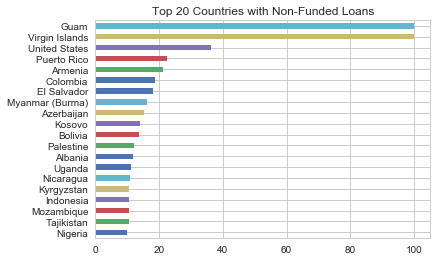

In [24]:
#Plotting percentage of non-funded loans by country; Guam and the Virgin
#Islands have almost a 100% rate of non-funded loans

A = (kiva_loans[kiva_loans['funded']==0]['country'].value_counts()/kiva_loans['country'].value_counts() * 100).sort_values(ascending=False)
A[0:20].sort_values().plot(kind='barh', title='Top 20 Countries with Non-Funded Loans')

In [25]:
#percentage of non-funded loans by activity

B = (kiva_loans[kiva_loans['funded']==0]['activity'].value_counts()/kiva_loans['activity'].value_counts() * 100).sort_values(ascending = False)
print(B)

Technology                   60.919540
Communications               42.553191
Cleaning Services            34.027778
Wedding Expenses             28.712871
Entertainment                23.112128
Phone Use Sales              23.061825
Mobile Transactions          20.833333
Landscaping / Gardening      20.588235
Electronics Sales            20.257827
Vehicle                      17.373899
Mobile Phones                16.411043
Spare Parts                  15.961692
Pub                          15.754190
Phone Accessories            15.734990
Auto Repair                  15.466262
Vehicle Repairs              15.220949
Taxi                         15.045942
Child Care                   14.917127
Electrical Goods             14.814815
Services                     14.734550
Hardware                     13.368421
Cattle                       12.841460
Barber Shop                  12.513256
Butcher Shop                 12.403500
Personal Housing Expenses    11.868710
Cosmetics Sales          

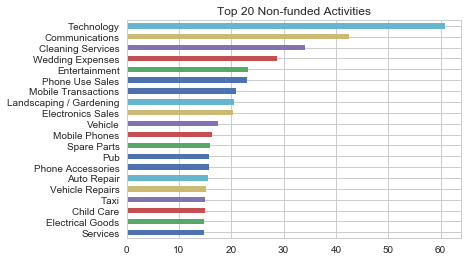

In [26]:
#plotting above data and only showing top 20 activities not funded

B[0:20].sort_values().plot(kind='barh', title='Top 20 Non-funded Activities')

In [27]:
#Create two dataframes: one for funded loans and one for non-funded loans

df_funded = kiva_loans[kiva_loans['funded'] == 1]
df_notfunded = kiva_loans[kiva_loans['funded'] == 0]

print(df_funded.shape)
print(df_notfunded.shape)

(619336, 25)
(47648, 25)


In [28]:
#Create funded dataframe with size of 50000 to be comparable to non-funded
#dataframe size; cap df size at 50,000 and choose every 3rd value

df_funded_s = df_funded.sample(n=50000, random_state=3)
df_funded_s.shape

(50000, 25)

In [29]:
#Merge funded sample size dataframe with non-funded dataframe for 
#prediction down below

df_final_s = pd.concat([df_funded_s, df_notfunded], ignore_index=True)
df_final_s.shape

(97648, 25)

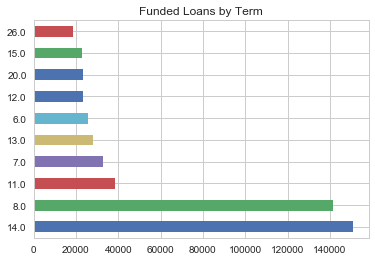

In [30]:
#Continue EDA

#looking at number of funded loans by loan term (payback period in months)

abc = df_funded.term_in_months.value_counts().sort_values(ascending=False).head(10) 

abc.plot(kind='barh', title='Funded Loans by Term')

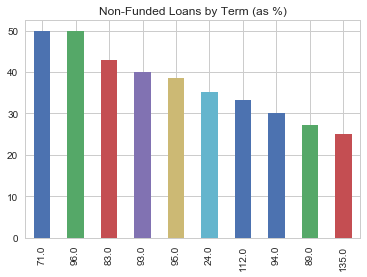

In [31]:
#plot percentage of non-funded loans with loan term; loans of 2 yrs+
#appear to have difficulty getting funded

F = (kiva_loans[kiva_loans['funded']==0]['term_in_months'].value_counts()/kiva_loans['term_in_months'].value_counts() * 100).sort_values(ascending = False).head(10)
F.plot(kind='bar', title='Non-Funded Loans by Term (as %)')


In [32]:
#looking at non-funded loan details for loan term

G = (kiva_loans[kiva_loans['funded']==0]['term_in_months'].describe())
print(G)

count    47648.000000
mean        18.270358
std          8.287440
min          2.000000
25%         14.000000
50%         14.000000
75%         21.000000
max        145.000000
Name: term_in_months, dtype: float64


In [33]:
#looking at funded loan details for loan term; biggest differences in
#funded and non-funded loan term details are the mean, first quartile,
#and third quartile

H = (kiva_loans[kiva_loans['funded']==1]['term_in_months'].describe())
print(H)

count    619336.000000
mean         13.380945
std           8.519813
min           1.000000
25%           8.000000
50%          12.000000
75%          14.000000
max         158.000000
Name: term_in_months, dtype: float64


In [34]:
#Non-funded by lender count

I = (kiva_loans[kiva_loans['funded']==0]['lender_count'].describe())
print(I)

count    47648.000000
mean        15.030411
std         17.575276
min          0.000000
25%          6.000000
50%         10.000000
75%         19.000000
max        805.000000
Name: lender_count, dtype: float64


In [35]:
#Funded loans by lender count; it appears that funded loans have a higher
#number of lenders overall

J = (kiva_loans[kiva_loans['funded']==1]['lender_count'].describe())
print(J)

count    619336.000000
mean         20.975587
std          28.987183
min           1.000000
25%           7.000000
50%          13.000000
75%          25.000000
max        2986.000000
Name: lender_count, dtype: float64


In [36]:
#Non-funded by repayment interval
K = (kiva_loans[kiva_loans['funded']==0]['repayment_interval'].value_counts()/kiva_loans['repayment_interval'].value_counts() * 100).sort_values(ascending = False)
print(K)

bullet       14.591171
monthly       9.046627
irregular     2.616409
weekly             NaN
Name: repayment_interval, dtype: float64


In [37]:
#Funded by repayment interval
L = (kiva_loans[kiva_loans['funded']==1]['repayment_interval'].value_counts()/kiva_loans['repayment_interval'].value_counts() * 100).sort_values(ascending = False)
print(L)

weekly       100.000000
irregular     97.383591
monthly       90.953373
bullet        85.408829
Name: repayment_interval, dtype: float64


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Initially I tried to dummy the relevant features and run Recursive Feature Elimination and reduce 850+ independent variables to top 50. This was too much for RFE. I also tried to run SMOTE on 850+ 'dummied' variables but SMOTE kept timing out.

In [38]:
#for_dummies = kiva_loans[['loan_amount', 'sector', 'country',
#                          'term_in_months', 'lender_count','repayment_interval']]

In [39]:
#df_final = pd.get_dummies(data=df, columns=['country', 'lender_count',
#                                           'repayment_interval', 'term_in_months',
#                                           'sector', 'loan_amount'])

#### Modeling starts now

Various independent variables will be dummied to see which one produces best score for predicting non-funded loans.

In [40]:
print(df_final_s.shape) #note dataframe size is 97,648 which reflects
#almost equally weighted funded vs non-funded loan data

print(df_final_s.columns)

(97648, 25)
Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date', 'funded', 'gender', 'female', 'group', 'male'],
      dtype='object')


In [41]:
#first prediction uses 'funded_amount' as independent variable; for this
#first pass, I am not going to make dummy vars with the funded amount

set1 = df_final_s[['funded_amount', 'funded']]
set1.head()

,funded_amount,funded
0,1450.0,1.0
1,850.0,1.0
2,925.0,1.0
3,450.0,1.0
4,350.0,1.0


In [42]:
#set the X and y values

X = set1.iloc[:, :-1]
y = set1.iloc[:, -1]
print(X.shape)
print(y.shape)

(97648, 1)
(97648,)


In [43]:
#split data into train and test; allocate 30% to test data

#at .52, the accuracy is not very good

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set:{:.3f}'.
      format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set:0.518


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7808 6509]
 [7619 7359]]


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.51      0.55      0.53     14317
         1.0       0.53      0.49      0.51     14978

   micro avg       0.52      0.52      0.52     29295
   macro avg       0.52      0.52      0.52     29295
weighted avg       0.52      0.52      0.52     29295



Now create dummies with funded_amount var and see if this improves
accuracy.

In [46]:
set1_dum = pd.get_dummies(data=set1, columns=['funded_amount'])

In [47]:
set1_dum.head()

,funded,funded_amount_0.0,funded_amount_5.0,funded_amount_10.0,funded_amount_15.0,funded_amount_20.0,funded_amount_25.0,funded_amount_30.0,funded_amount_35.0,funded_amount_40.0,...,funded_amount_16350.0,funded_amount_17050.0,funded_amount_18050.0,funded_amount_18325.0,funded_amount_20000.0,funded_amount_22500.0,funded_amount_30000.0,funded_amount_40000.0,funded_amount_46125.0,funded_amount_50000.0
0,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
#this moves 'funded' column to last column in dataframe

cols = set1_dum.columns.tolist()
column_to_move = 'funded'
new_position = 498
cols.insert(new_position, cols.pop(cols.index(column_to_move)))
set1_final = set1_dum[cols]
set1_final.head()

,funded_amount_0.0,funded_amount_5.0,funded_amount_10.0,funded_amount_15.0,funded_amount_20.0,funded_amount_25.0,funded_amount_30.0,funded_amount_35.0,funded_amount_40.0,funded_amount_45.0,...,funded_amount_17050.0,funded_amount_18050.0,funded_amount_18325.0,funded_amount_20000.0,funded_amount_22500.0,funded_amount_30000.0,funded_amount_40000.0,funded_amount_46125.0,funded_amount_50000.0,funded
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [49]:
X1 = set1_final.iloc[:, :-1]
y1 = set1_final.iloc[:, -1]
print(X1.shape)
print(y1.shape)

(97648, 497)
(97648,)


In [50]:
#By binarizing the 'funded_amount' data, accuracy improves by 8 points
#to .60 from .52

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)
#logreg = LogisticRegression()
logreg.fit(X1_train, y1_train)

y_pred = logreg.predict(X1_test)
print('Accuracy of logistic regression classifier on test set:{:.3f}'.
      format(logreg.score(X1_test, y1_test)))

print()

print(classification_report(y1_test, y_pred))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of logistic regression classifier on test set:0.603

              precision    recall  f1-score   support

         0.0       0.61      0.52      0.56     14317
         1.0       0.60      0.68      0.64     14978

   micro avg       0.60      0.60      0.60     29295
   macro avg       0.60      0.60      0.60     29295
weighted avg       0.60      0.60      0.60     29295



#### Next independent variable is activity; from now on all independent variables will be dummied.


In [51]:
set2 = df_final_s[['activity', 'funded']]
set2_dum = pd.get_dummies(data=set2, columns=['activity'])
print(set2_dum.head())

   funded  activity_Agriculture  activity_Air Conditioning  \
0     1.0                     0                          0   
1     1.0                     0                          0   
2     1.0                     0                          0   
3     1.0                     0                          0   
4     1.0                     0                          0   

   activity_Animal Sales  activity_Aquaculture  activity_Arts  \
0                      0                     0              0   
1                      0                     0              0   
2                      0                     0              0   
3                      0                     0              0   
4                      0                     0              0   

   activity_Auto Repair  activity_Bakery  activity_Balut-Making  \
0                     0                0                      0   
1                     0                0                      0   
2                     0            

In [52]:
#this moves 'funded' column to last column in dataframe

cols = set2_dum.columns.tolist()
column_to_move = 'funded'
new_position = 160
cols.insert(new_position, cols.pop(cols.index(column_to_move)))
set2_final = set2_dum[cols]
set2_final.head(2)

,activity_Agriculture,activity_Air Conditioning,activity_Animal Sales,activity_Aquaculture,activity_Arts,activity_Auto Repair,activity_Bakery,activity_Balut-Making,activity_Barber Shop,activity_Beauty Salon,...,activity_Vehicle,activity_Vehicle Repairs,activity_Veterinary Sales,activity_Waste Management,activity_Water Distribution,activity_Weaving,activity_Wedding Expenses,activity_Well digging,activity_Wholesale,funded
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [53]:
X2 = set2_final.iloc[:, :-1]
y2 = set2_final.iloc[:, -1]
print(X2.shape)
print(y2.shape)
print()
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)
#logreg = LogisticRegression()
logreg.fit(X2_train, y2_train)

y_pred = logreg.predict(X2_test)
print('Accuracy of logistic regression classifier on test set:{:.3f}'.
      format(logreg.score(X2_test, y2_test)))

print()

print(classification_report(y2_test, y_pred))

(97648, 159)
(97648,)



/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of logistic regression classifier on test set:0.606

              precision    recall  f1-score   support

         0.0       0.58      0.67      0.62     14317
         1.0       0.63      0.54      0.59     14978

   micro avg       0.61      0.61      0.61     29295
   macro avg       0.61      0.61      0.61     29295
weighted avg       0.61      0.61      0.60     29295



#### Next independent variable is gender

In [54]:
set3 = df_final_s[['female', 'group', 'male', 'funded']]
set3.head()

,female,group,male,funded
0,1,0,0,1.0
1,0,0,1,1.0
2,1,0,0,1.0
3,1,0,0,1.0
4,1,0,0,1.0


In [55]:
X3 = set3.iloc[:, :-1]
y3 = set3.iloc[:, -1]
print(X3.shape)
print(y3.shape)
print()
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=0)
#logreg = LogisticRegression()
logreg.fit(X3_train, y3_train)

y_pred = logreg.predict(X3_test)
print('Accuracy of logistic regression classifier on test set:{:.3f}'.
      format(logreg.score(X3_test, y3_test)))

print()

print(classification_report(y3_test, y_pred))

(97648, 3)
(97648,)

Accuracy of logistic regression classifier on test set:0.636

              precision    recall  f1-score   support

         0.0       0.70      0.44      0.54     14317
         1.0       0.61      0.82      0.70     14978

   micro avg       0.64      0.64      0.64     29295
   macro avg       0.65      0.63      0.62     29295
weighted avg       0.65      0.64      0.62     29295



/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Next independent variable is country

In [56]:
set4 = df_final_s[['country', 'funded']]
set4_dum = pd.get_dummies(data=set4, columns=['country'])
print(set4_dum.head(1))

   funded  country_Albania  country_Armenia  country_Azerbaijan  \
0     1.0                0                0                   0   

   country_Belize  country_Benin  country_Bolivia  country_Brazil  \
0               0              0                1               0   

   country_Burkina Faso  country_Burundi        ...         country_Togo  \
0                     0                0        ...                    0   

   country_Turkey  country_Uganda  country_Ukraine  country_United States  \
0               0               0                0                      0   

   country_Vietnam  country_Virgin Islands  country_Yemen  country_Zambia  \
0                0                       0              0               0   

   country_Zimbabwe  
0                 0  

[1 rows x 82 columns]


In [57]:
#this moves 'funded' column to last column in dataframe

cols = set4_dum.columns.tolist()
column_to_move = 'funded'
new_position = 82
cols.insert(new_position, cols.pop(cols.index(column_to_move)))
set4_final = set4_dum[cols]
set4_final.head(1)

,country_Albania,country_Armenia,country_Azerbaijan,country_Belize,country_Benin,country_Bolivia,country_Brazil,country_Burkina Faso,country_Burundi,country_Cambodia,...,country_Turkey,country_Uganda,country_Ukraine,country_United States,country_Vietnam,country_Virgin Islands,country_Yemen,country_Zambia,country_Zimbabwe,funded
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [58]:
X4 = set4_final.iloc[:, :-1]
y4 = set4_final.iloc[:, -1]
print(X4.shape)
print(y4.shape)
print()
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=0)
#logreg = LogisticRegression()
logreg.fit(X4_train, y4_train)

y_pred = logreg.predict(X4_test)
print('Accuracy of logistic regression classifier on test set:{:.3f}'.
      format(logreg.score(X4_test, y4_test)))

print()

print(classification_report(y4_test, y_pred))

(97648, 81)
(97648,)

Accuracy of logistic regression classifier on test set:0.667



/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

         0.0       0.66      0.64      0.65     14317
         1.0       0.67      0.69      0.68     14978

   micro avg       0.67      0.67      0.67     29295
   macro avg       0.67      0.67      0.67     29295
weighted avg       0.67      0.67      0.67     29295



#### Next independent variable is 'term in months'

In [59]:
set5 = df_final_s[['term_in_months', 'funded']]
set5_dum = pd.get_dummies(data=set5, columns=['term_in_months'])
print(set5_dum.head(1))

   funded  term_in_months_1.0  term_in_months_2.0  term_in_months_3.0  \
0     1.0                   0                   0                   0   

   term_in_months_4.0  term_in_months_5.0  term_in_months_6.0  \
0                   0                   0                   0   

   term_in_months_7.0  term_in_months_8.0  term_in_months_9.0  \
0                   0                   0                   0   

           ...           term_in_months_120.0  term_in_months_121.0  \
0          ...                              0                     0   

   term_in_months_122.0  term_in_months_125.0  term_in_months_130.0  \
0                     0                     0                     0   

   term_in_months_131.0  term_in_months_134.0  term_in_months_135.0  \
0                     0                     0                     0   

   term_in_months_141.0  term_in_months_145.0  
0                     0                     0  

[1 rows x 108 columns]


In [60]:
#this moves 'funded' column to last column in dataframe

cols = set5_dum.columns.tolist()
column_to_move = 'funded'
new_position = 108
cols.insert(new_position, cols.pop(cols.index(column_to_move)))
set5_final = set5_dum[cols]
set5_final.head(1)

,term_in_months_1.0,term_in_months_2.0,term_in_months_3.0,term_in_months_4.0,term_in_months_5.0,term_in_months_6.0,term_in_months_7.0,term_in_months_8.0,term_in_months_9.0,term_in_months_10.0,...,term_in_months_121.0,term_in_months_122.0,term_in_months_125.0,term_in_months_130.0,term_in_months_131.0,term_in_months_134.0,term_in_months_135.0,term_in_months_141.0,term_in_months_145.0,funded
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [61]:
X5 = set5_final.iloc[:, :-1]
y5 = set5_final.iloc[:, -1]
print(X5.shape)
print(y5.shape)
print()
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3, random_state=0)
#logreg = LogisticRegression()
logreg.fit(X5_train, y5_train)

y_pred = logreg.predict(X5_test)
print('Accuracy of logistic regression classifier on test set:{:.3f}'.
      format(logreg.score(X5_test, y5_test)))

print()

print(classification_report(y5_test, y_pred))

(97648, 107)
(97648,)



/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of logistic regression classifier on test set:0.679

              precision    recall  f1-score   support

         0.0       0.63      0.83      0.72     14317
         1.0       0.77      0.54      0.63     14978

   micro avg       0.68      0.68      0.68     29295
   macro avg       0.70      0.68      0.67     29295
weighted avg       0.70      0.68      0.67     29295



#### Next independent variable is repayment_interval

In [62]:
set6 = df_final_s[['repayment_interval', 'funded']]
set6_dum = pd.get_dummies(data=set6, columns=['repayment_interval'])
print(set6_dum.head(1))

   funded  repayment_interval_bullet  repayment_interval_irregular  \
0     1.0                          0                             0   

   repayment_interval_monthly  repayment_interval_weekly  
0                           1                          0  


In [63]:
#this moves 'funded' column to last column in dataframe

cols = set6_dum.columns.tolist()
column_to_move = 'funded'
new_position = 108
cols.insert(new_position, cols.pop(cols.index(column_to_move)))
set6_final = set6_dum[cols]
set6_final.head(1)

,repayment_interval_bullet,repayment_interval_irregular,repayment_interval_monthly,repayment_interval_weekly,funded
0,0,0,1,0,1.0


In [64]:
X6 = set6_final.iloc[:, :-1]
y6 = set6_final.iloc[:, -1]
print(X6.shape)
print(y6.shape)
print()
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.3, random_state=0)
#logreg = LogisticRegression()
logreg.fit(X6_train, y6_train)

y_pred = logreg.predict(X6_test)
print('Accuracy of logistic regression classifier on test set:{:.3f}'.
      format(logreg.score(X6_test, y6_test)))

print()

print(classification_report(y6_test, y_pred))

(97648, 4)
(97648,)

Accuracy of logistic regression classifier on test set:0.626

              precision    recall  f1-score   support

         0.0       0.58      0.86      0.69     14317
         1.0       0.75      0.41      0.53     14978

   micro avg       0.63      0.63      0.63     29295
   macro avg       0.66      0.63      0.61     29295
weighted avg       0.67      0.63      0.61     29295



/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Next independent variable is sector

In [65]:
set7 = df_final_s[['sector', 'funded']]
set7_dum = pd.get_dummies(data=set7, columns=['sector'])
print(set7_dum.head(1))
print(set7_dum.shape)

   funded  sector_Agriculture  sector_Arts  sector_Clothing  \
0     1.0                   0            0                0   

   sector_Construction  sector_Education  sector_Entertainment  sector_Food  \
0                    0                 0                     0            0   

   sector_Health  sector_Housing  sector_Manufacturing  sector_Personal Use  \
0              1               0                     0                    0   

   sector_Retail  sector_Services  sector_Transportation  sector_Wholesale  
0              0                0                      0                 0  
(97648, 16)


In [66]:
#this moves 'funded' column to last column in dataframe

cols = set7_dum.columns.tolist()
column_to_move = 'funded'
new_position = 16
cols.insert(new_position, cols.pop(cols.index(column_to_move)))
set7_final = set7_dum[cols]
set7_final.head(1)

,sector_Agriculture,sector_Arts,sector_Clothing,sector_Construction,sector_Education,sector_Entertainment,sector_Food,sector_Health,sector_Housing,sector_Manufacturing,sector_Personal Use,sector_Retail,sector_Services,sector_Transportation,sector_Wholesale,funded
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1.0


In [67]:
X7 = set7_final.iloc[:, :-1]
y7 = set7_final.iloc[:, -1]
print(X7.shape)
print(y7.shape)
print()
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.3, random_state=0)
#logreg = LogisticRegression()
logreg.fit(X7_train, y7_train)

y_pred = logreg.predict(X7_test)
print('Accuracy of logistic regression classifier on test set:{:.3f}'.
      format(logreg.score(X7_test, y7_test)))

print()

print(classification_report(y7_test, y_pred))

(97648, 15)
(97648,)



/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of logistic regression classifier on test set:0.558

              precision    recall  f1-score   support

         0.0       0.53      0.77      0.63     14317
         1.0       0.62      0.36      0.45     14978

   micro avg       0.56      0.56      0.56     29295
   macro avg       0.57      0.56      0.54     29295
weighted avg       0.58      0.56      0.54     29295



#### Next independent variable is lender_count

In [68]:
set8 = df_final_s[['lender_count', 'funded']]
set8_dum = pd.get_dummies(data=set8, columns=['lender_count'])
print(set8_dum.head(1))
print(set8_dum.shape)

   funded  lender_count_0  lender_count_1  lender_count_2  lender_count_3  \
0     1.0               0               0               0               0   

   lender_count_4  lender_count_5  lender_count_6  lender_count_7  \
0               0               0               0               0   

   lender_count_8        ...          lender_count_521  lender_count_566  \
0               0        ...                         0                 0   

   lender_count_642  lender_count_684  lender_count_738  lender_count_805  \
0                 0                 0                 0                 0   

   lender_count_970  lender_count_1330  lender_count_1446  lender_count_1550  
0                 0                  0                  0                  0  

[1 rows x 278 columns]
(97648, 278)


In [69]:
#this moves 'funded' column to last column in dataframe

cols = set8_dum.columns.tolist()
column_to_move = 'funded'
new_position = 278
cols.insert(new_position, cols.pop(cols.index(column_to_move)))
set8_final = set8_dum[cols]
set8_final.head(1)

,lender_count_0,lender_count_1,lender_count_2,lender_count_3,lender_count_4,lender_count_5,lender_count_6,lender_count_7,lender_count_8,lender_count_9,...,lender_count_566,lender_count_642,lender_count_684,lender_count_738,lender_count_805,lender_count_970,lender_count_1330,lender_count_1446,lender_count_1550,funded
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [70]:
X8 = set8_final.iloc[:, :-1]
y8 = set8_final.iloc[:, -1]
print(X8.shape)
print(y8.shape)
print()
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8, test_size=0.3, random_state=0)
#logreg = LogisticRegression()
logreg.fit(X8_train, y8_train)

y_pred = logreg.predict(X8_test)
print('Accuracy of logistic regression classifier on test set:{:.3f}'.
      format(logreg.score(X8_test, y8_test)))

print()

print(classification_report(y8_test, y_pred))

(97648, 277)
(97648,)



/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of logistic regression classifier on test set:0.567

              precision    recall  f1-score   support

         0.0       0.56      0.57      0.56     14317
         1.0       0.58      0.56      0.57     14978

   micro avg       0.57      0.57      0.57     29295
   macro avg       0.57      0.57      0.57     29295
weighted avg       0.57      0.57      0.57     29295



#### Now combine top 4 scoring independent variables and see if score improves

In [71]:
set9 = df_final_s[['term_in_months', 'country', 'male', 'female',
                   'group', 'repayment_interval', 'funded']]
set9_dum = pd.get_dummies(data=set9, columns=['term_in_months', 'country',
                                             'repayment_interval'])
print(set9_dum.head(1))
print(set9_dum.shape)

   male  female  group  funded  term_in_months_1.0  term_in_months_2.0  \
0     0       1      0     1.0                   0                   0   

   term_in_months_3.0  term_in_months_4.0  term_in_months_5.0  \
0                   0                   0                   0   

   term_in_months_6.0            ...              country_United States  \
0                   0            ...                                  0   

   country_Vietnam  country_Virgin Islands  country_Yemen  country_Zambia  \
0                0                       0              0               0   

   country_Zimbabwe  repayment_interval_bullet  repayment_interval_irregular  \
0                 0                          0                             0   

   repayment_interval_monthly  repayment_interval_weekly  
0                           1                          0  

[1 rows x 196 columns]
(97648, 196)


In [72]:
#this moves 'funded' column to last column in dataframe

cols = set9_dum.columns.tolist()
column_to_move = 'funded'
new_position = 196
cols.insert(new_position, cols.pop(cols.index(column_to_move)))
set9_final = set9_dum[cols]
set9_final.head(1)

,male,female,group,term_in_months_1.0,term_in_months_2.0,term_in_months_3.0,term_in_months_4.0,term_in_months_5.0,term_in_months_6.0,term_in_months_7.0,...,country_Vietnam,country_Virgin Islands,country_Yemen,country_Zambia,country_Zimbabwe,repayment_interval_bullet,repayment_interval_irregular,repayment_interval_monthly,repayment_interval_weekly,funded
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.0


In [73]:
X9 = set9_final.iloc[:, :-1]
y9 = set9_final.iloc[:, -1]
print(X9.shape)
print(y9.shape)
print()
X9_train, X9_test, y9_train, y9_test = train_test_split(X9, y9, test_size=0.3, random_state=0)
#logreg = LogisticRegression()
logreg.fit(X9_train, y9_train)

y_pred = logreg.predict(X9_test)
print('Accuracy of logistic regression classifier on test set:{:.3f}'.
      format(logreg.score(X9_test, y9_test)))

print()

print(classification_report(y9_test, y_pred))

(97648, 195)
(97648,)



/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of logistic regression classifier on test set:0.733

              precision    recall  f1-score   support

         0.0       0.71      0.78      0.74     14317
         1.0       0.77      0.69      0.73     14978

   micro avg       0.73      0.73      0.73     29295
   macro avg       0.74      0.73      0.73     29295
weighted avg       0.74      0.73      0.73     29295



#### Combine top 3 scoring independent vars

In [74]:
set10 = df_final_s[['term_in_months', 'country', 'male', 'female',
                   'group', 'funded']]
set10_dum = pd.get_dummies(data=set10, columns=['term_in_months',
                                                'country'])
print(set10_dum.head(1))
print(set10_dum.shape)

   male  female  group  funded  term_in_months_1.0  term_in_months_2.0  \
0     0       1      0     1.0                   0                   0   

   term_in_months_3.0  term_in_months_4.0  term_in_months_5.0  \
0                   0                   0                   0   

   term_in_months_6.0        ...         country_Togo  country_Turkey  \
0                   0        ...                    0               0   

   country_Uganda  country_Ukraine  country_United States  country_Vietnam  \
0               0                0                      0                0   

   country_Virgin Islands  country_Yemen  country_Zambia  country_Zimbabwe  
0                       0              0               0                 0  

[1 rows x 192 columns]
(97648, 192)


In [75]:
#this moves 'funded' column to last column in dataframe

cols = set10_dum.columns.tolist()
column_to_move = 'funded'
new_position = 192
cols.insert(new_position, cols.pop(cols.index(column_to_move)))
set10_final = set10_dum[cols]
set10_final.head(1)

,male,female,group,term_in_months_1.0,term_in_months_2.0,term_in_months_3.0,term_in_months_4.0,term_in_months_5.0,term_in_months_6.0,term_in_months_7.0,...,country_Turkey,country_Uganda,country_Ukraine,country_United States,country_Vietnam,country_Virgin Islands,country_Yemen,country_Zambia,country_Zimbabwe,funded
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [76]:
X10 = set10_final.iloc[:, :-1]
y10 = set10_final.iloc[:, -1]
print(X10.shape)
print(y10.shape)
print()
X10_train, X10_test, y10_train, y10_test = train_test_split(X10, y10, test_size=0.3, random_state=0)
#logreg = LogisticRegression()
logreg.fit(X10_train, y10_train)

y_pred = logreg.predict(X10_test)
print('Accuracy of logistic regression classifier on test set:{:.3f}'.
      format(logreg.score(X10_test, y10_test)))

print()

print(classification_report(y10_test, y_pred))

(97648, 191)
(97648,)



/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of logistic regression classifier on test set:0.737

              precision    recall  f1-score   support

         0.0       0.72      0.76      0.74     14317
         1.0       0.76      0.72      0.74     14978

   micro avg       0.74      0.74      0.74     29295
   macro avg       0.74      0.74      0.74     29295
weighted avg       0.74      0.74      0.74     29295



#### Combine top 2 scoring independent vars

In [77]:
set11 = df_final_s[['term_in_months', 'country', 'funded']]
set11_dum = pd.get_dummies(data=set11, columns=['term_in_months',
                                                'country'])
print(set11_dum.head(1))
print(set11_dum.shape)

   funded  term_in_months_1.0  term_in_months_2.0  term_in_months_3.0  \
0     1.0                   0                   0                   0   

   term_in_months_4.0  term_in_months_5.0  term_in_months_6.0  \
0                   0                   0                   0   

   term_in_months_7.0  term_in_months_8.0  term_in_months_9.0  \
0                   0                   0                   0   

         ...         country_Togo  country_Turkey  country_Uganda  \
0        ...                    0               0               0   

   country_Ukraine  country_United States  country_Vietnam  \
0                0                      0                0   

   country_Virgin Islands  country_Yemen  country_Zambia  country_Zimbabwe  
0                       0              0               0                 0  

[1 rows x 189 columns]
(97648, 189)


In [78]:
#this moves 'funded' column to last column in dataframe

cols = set11_dum.columns.tolist()
column_to_move = 'funded'
new_position = 189
cols.insert(new_position, cols.pop(cols.index(column_to_move)))
set11_final = set11_dum[cols]
set11_final.head(1)

,term_in_months_1.0,term_in_months_2.0,term_in_months_3.0,term_in_months_4.0,term_in_months_5.0,term_in_months_6.0,term_in_months_7.0,term_in_months_8.0,term_in_months_9.0,term_in_months_10.0,...,country_Turkey,country_Uganda,country_Ukraine,country_United States,country_Vietnam,country_Virgin Islands,country_Yemen,country_Zambia,country_Zimbabwe,funded
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [79]:
X11 = set11_final.iloc[:, :-1]
y11 = set11_final.iloc[:, -1]
print(X11.shape)
print(y11.shape)
print()
X11_train, X11_test, y11_train, y11_test = train_test_split(X11, y11, test_size=0.3, random_state=0)
#logreg = LogisticRegression()
logreg.fit(X11_train, y11_train)

y_pred = logreg.predict(X11_test)
print('Accuracy of logistic regression classifier on test set:{:.3f}'.
      format(logreg.score(X11_test, y11_test)))

print()

print(classification_report(y11_test, y_pred))

(97648, 188)
(97648,)



/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of logistic regression classifier on test set:0.705

              precision    recall  f1-score   support

         0.0       0.67      0.78      0.72     14317
         1.0       0.75      0.63      0.69     14978

   micro avg       0.70      0.70      0.70     29295
   macro avg       0.71      0.71      0.70     29295
weighted avg       0.71      0.70      0.70     29295



In [80]:
set12 = df_final_s[['country', 'activity','repayment_interval', 'term_in_months','male', 'female', 'group','funded']]

set12_dum = pd.get_dummies(data=set12, columns=['country', 'activity','repayment_interval', 'term_in_months','male', 'female', 'group'])

In [81]:
set12_dum.head(1)

,funded,country_Albania,country_Armenia,country_Azerbaijan,country_Belize,country_Benin,country_Bolivia,country_Brazil,country_Burkina Faso,country_Burundi,...,term_in_months_134.0,term_in_months_135.0,term_in_months_141.0,term_in_months_145.0,male_0,male_1,female_0,female_1,group_0,group_1
0,1.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0


In [82]:
#this moves 'funded' column to last column in dataframe

cols = set12_dum.columns.tolist()
column_to_move = 'funded'
new_position = 358
cols.insert(new_position, cols.pop(cols.index(column_to_move)))
set12_final = set12_dum[cols]
set12_final.head(1)

,country_Albania,country_Armenia,country_Azerbaijan,country_Belize,country_Benin,country_Bolivia,country_Brazil,country_Burkina Faso,country_Burundi,country_Cambodia,...,term_in_months_135.0,term_in_months_141.0,term_in_months_145.0,male_0,male_1,female_0,female_1,group_0,group_1,funded
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,1,0,1.0


In [83]:
X12 = set12_final.iloc[:, :-1]
y12 = set12_final.iloc[:, -1]
print(X12.shape)
print(y12.shape)
print()
X12_train, X12_test, y12_train, y12_test = train_test_split(X12, y12, test_size=0.3, random_state=0)
#logreg = LogisticRegression()
logreg.fit(X12_train, y12_train)

y_pred = logreg.predict(X12_test)
print('Accuracy of logistic regression classifier on test set:{:.3f}'.
      format(logreg.score(X12_test, y12_test)))

print()

print(classification_report(y12_test, y_pred))

(97648, 357)
(97648,)



/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of logistic regression classifier on test set:0.764

              precision    recall  f1-score   support

         0.0       0.74      0.81      0.77     14317
         1.0       0.80      0.72      0.76     14978

   micro avg       0.76      0.76      0.76     29295
   macro avg       0.77      0.76      0.76     29295
weighted avg       0.77      0.76      0.76     29295



#### All models run using Logistic Regression.


| Independent Variable                  | Overall Accuracy | 0 score | 1 score | 
|---------------------------------------|------------------|---------|---------|
| Loan Amount (not 'dummied')           |       51.8%      |   53%   |   51%   |  
| Loan Amount (dummy)                   |       60.3%      |   56%   |   64%   | 
| Activity (dummy)                      |       60.6%      |   62%   |   59%   | 
| Gender (dummy)                        |       63.6%      |   54%   |   70%   |  
| Country (dummy)                       |       66.7%      |   65%   |   68%   | 
| Loan Term in Months (dummy)           |       67.9%      |   72%   |   63%   |  
| Repayment Interval (dummy)            |       62.6%      |   69%   |   53%   |     
| Sector (dummy)                        |       55.8%      |   63%   |   45%   |
| Lender Count (dummy)                  |       56.7%      |   56%   |   57%   |

#### Combining top scoring independent variables


| Independent Variable                         | Overall Accuracy | 0 score | 1 score | 
|----------------------------------------------|------------------|---------|---------|
| Loan Term, Country                           |       70.5%      |   72%   |   69%   |  
| Loan Term, Country, Gender                   |       73.7%      |   74%   |   74%   | 
| Loan Term, Country, Gender, Repayment Time   |       73.3%      |   74%   |   73%   | 
| Loan Term, Country, Gender, Repayment Time,                     |         |         |  
| Activity                                     |       76.4%      |   77%   |   76%   | 



### Conclusion

Best predictor of a KIVA loan getting funded or not is to combine 5 independent variables: Loan Term, Country, Gender, Repayment Time, and Activity.


### The End

In [84]:
#Below code reflects SMOTE and RFE attempts

In [85]:
'''
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
'''

'\nfrom imblearn.over_sampling import SMOTE\n\nos = SMOTE(random_state=0)\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)\ncolumns = X_train.columns\n'

In [86]:
'''
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['funded'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['funded']==0]))
print("Number of subscription",len(os_data_y[os_data_y['funded']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['funded']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['funded']==1])/len(os_data_X))

'''

'\nos_data_X,os_data_y=os.fit_sample(X_train, y_train)\nos_data_X = pd.DataFrame(data=os_data_X,columns=columns )\nos_data_y= pd.DataFrame(data=os_data_y,columns=[\'funded\'])\n# we can Check the numbers of our data\nprint("length of oversampled data is ",len(os_data_X))\nprint("Number of no subscription in oversampled data",len(os_data_y[os_data_y[\'funded\']==0]))\nprint("Number of subscription",len(os_data_y[os_data_y[\'funded\']==1]))\nprint("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y[\'funded\']==0])/len(os_data_X))\nprint("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y[\'funded\']==1])/len(os_data_X))\n\n'

In [87]:
#tried importing Recursive Feature Elimination and reducing 850
#independent vars to top 50

'''
from sklearn.feature_selection import RFE
logreg = LogisticRegression(solver='liblinear', penalty='l2')
rfe = RFE(logreg, 50, step=1)
rfe = rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)
'''

"\nfrom sklearn.feature_selection import RFE\nlogreg = LogisticRegression(solver='liblinear', penalty='l2')\nrfe = RFE(logreg, 50, step=1)\nrfe = rfe.fit(X, y)\nprint(rfe.support_)\nprint(rfe.ranking_)\n"

In [88]:
#Tried running LogReg and increasing max_iter to 10,000 because default
#value of max_iter=1,000 was throwing error

'''
logreg = LogisticRegression(solver='liblinear', max_iter=10000)
rfe = RFE(logreg, 50, step=1)
rfe = rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)

'''

"\nlogreg = LogisticRegression(solver='liblinear', max_iter=10000)\nrfe = RFE(logreg, 50, step=1)\nrfe = rfe.fit(X, y)\nprint(rfe.support_)\nprint(rfe.ranking_)\n\n"